# Семинар  $10$ Решение задач

## Задача $1$

Есть ли различие между процентным содержанием изотопов плутония? <br>
Используйте функции в Python <br>
Провести предварительный разведочный анализ (проверку на нормальность и равенство дисперсий*)

\* Использовать Барлетт тест from scipy.stats import bartlett<br> 
Данные для задачи из пакета cluster (для R)

In [20]:
# 1
import numpy as np
# pu_238:
x1 = np.array([0.126, 0.133, 0.127, 0.156, 0.503, 0.113, 0.129, 0.124, 1.022, 1.412, 1.533, 1.534, 1.437, 1.439, 1.375, 1.153, 0.201, 0.176, 0.239, 0.102, 1.070, 0.851, 0.125, 0.142, 0.352, 0.351, 0.346, 0.217, 1.068, 1.171, 1.213, 1.226, 1.111, 0.183, 0.162, 0.113, 1.309, 1.638, 1.589, 1.411, 1.457, 0.397, 0.328, 0.242, 1.367])
# pu_239:
x2 = np.array([75.804, 75.515, 75.175, 78.872, 73.317, 79.116, 75.751, 75.326, 63.287, 59.553, 58.688, 58.758, 59.728, 59.544, 59.877, 61.182, 78.244, 78.166, 74.254, 79.840, 62.455, 73.189, 75.968, 75.957, 72.885,72.907, 72.919, 76.089, 70.129, 69.273, 69.147, 68.294, 71.076, 75.714, 76.150, 77.845, 62.382, 60.112, 60.519, 61.585, 61.332, 72.291, 73.451, 74.888, 60.507])
# pu_240:
x3 = np.array([21.204, 21.408, 21.668, 18.428, 20.223, 18.548, 21.162, 21.557, 24.493, 25.576, 25.719, 25.692, 25.146, 25.126, 25.128, 25.100, 18.488, 18.629, 21.515, 17.872, 24.656, 18.285, 20.794, 20.867, 21.718, 21.721, 21.713, 20.225, 18.573, 18.633, 18.640, 18.869, 18.122, 20.750, 20.345, 19.108, 22.754, 23.320, 23.128, 23.133, 23.239, 21.761, 21.429, 20.939, 23.603])
# pu_241:
x4 = np.array([2.180, 2.240, 2.305, 1.906, 4.128, 1.690, 2.260, 2.282, 6.990, 8.027, 8.279, 8.261, 8.377, 8.569, 8.428, 7.802, 2.351, 2.365, 2.901, 1.674, 7.512, 5.597, 2.407, 2.341, 3.618, 3.601, 3.600, 2.556, 7.689, 8.300, 8.363, 8.826, 7.248, 2.488, 2.524, 2.275, 9.311, 9.972, 9.970, 9.339, 9.321, 3.836, 3.419, 2.875, 9.839])

Проверку на нормальность проведем при помощи теста Шапиро  - Уилка

In [21]:
# проверка на нормальность
from scipy import stats

# H0: нормальное распределение 
print(stats.shapiro(x1))
print(stats.shapiro(x2))
print(stats.shapiro(x3))
print(stats.shapiro(x4))

ShapiroResult(statistic=0.8199635744094849, pvalue=6.733238933520624e-06)
ShapiroResult(statistic=0.8647032380104065, pvalue=8.951310883276165e-05)
ShapiroResult(statistic=0.9316781759262085, pvalue=0.010755813680589199)
ShapiroResult(statistic=0.8336212635040283, pvalue=1.4246789760363754e-05)


Так как все _pvalue_ $ < \alpha = 0.05$ то нулевая гипотеза $H_0:$ что данные имеют нормальное распределение не устояла, данные не имеют нормального распределения, поэтому мы можем применить непараметрический критерий

In [22]:
import statsmodels.api as sm
import matplotlib.pyplot as plt


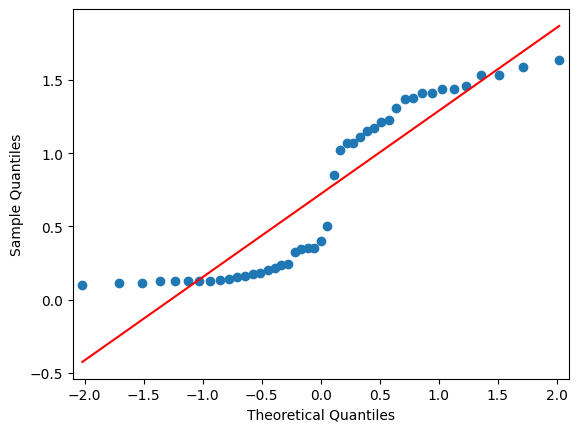

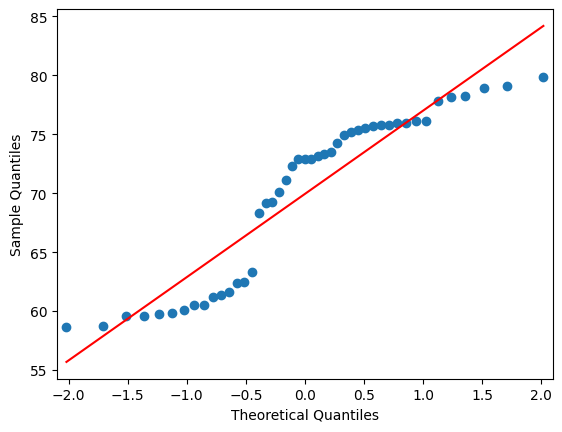

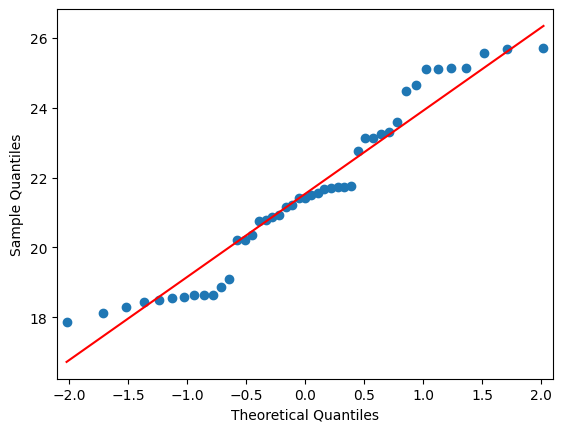

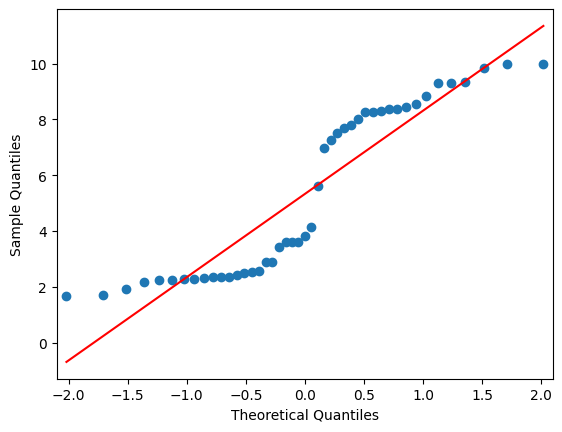

In [23]:

fig = sm.qqplot(x1, line='s')
fig = sm.qqplot(x2, line='s')
fig = sm.qqplot(x3, line='s')
fig = sm.qqplot(x4, line='s')
plt.show()

In [24]:
stats.kruskal(x1, x2, x3, x4)

KruskalResult(statistic=167.8178522154513, pvalue=3.76478949748032e-36)

_pvalue_ $ < \alpha = 0.05$, следовательно нулевая гипотеза об отсутствии различий - отвергается, статистически значимые различия есть.

In [43]:
import scikit_posthocs

In [44]:
scikit_posthocs.posthoc_nemenyi([x1, x2, x3, x4])

,1,2,3,4
1,1.000000e+00,1.574935e-32,1.758922e-14,7.836552e-04
2,1.574935e-32,1.000000e+00,7.836552e-04,1.758922e-14
3,1.758922e-14,7.836552e-04,1.000000e+00,7.836552e-04
4,7.836552e-04,1.758922e-14,7.836552e-04,1.000000e+00


## Задача $2$

Даны квартальные прибыли акции Johnson&Johnson с 1960-1980 гг<br>
Есть ли различия прибыли между 4-мя кварталами?<br>
Провести EDA:
+ проверка на нормальность,
+ проверка на однородность дисперсий с помощью Барлетт теста <br>
from scipy.stats import bartlett

Учитывайте при выборе теста тот факт, что при сбалансированных данных (выборки одинакового объема), неоднородность дисперсий слабо влияет на результат


In [25]:
# 2
JJ_1 = np.array([0.71, 0.63, 0.85, 0.44, 0.61, 0.69, 0.92, 0.55, 0.72, 0.77, 0.92, 0.60, 0.83, 0.80, 1.00, 0.77, 0.92, 1.00, 1.24, 1.00, 1.16 ])
JJ_2 = np.array([1.30, 1.45, 1.25, 1.26, 1.38, 1.86, 1.56, 1.53, 1.59, 1.83, 1.86, 1.53, 2.07, 2.34, 2.25, 2.16, 2.43, 2.70, 2.25, 2.79, 3.42 ])
JJ_3 = np.array([3.69, 3.60, 3.60, 4.32, 4.32, 4.05, 4.86, 5.04, 5.04, 4.41, 5.58, 5.85, 6.57, 5.31, 6.03, 6.39, 6.93, 5.85, 6.93, 7.74,  7.83])
JJ_4 = np.array([6.12, 7.74, 8.91, 8.28, 6.84, 9.54, 10.26, 9.54, 8.73, 11.88, 12.06, 12.15, 8.91, 14.04, 12.96, 14.85, 9.99, 16.20, 14.67, 16.02, 11.61])

In [26]:
# проверка на нормальность
print(stats.shapiro(JJ_1))
print(stats.shapiro(JJ_2))
print(stats.shapiro(JJ_3))
print(stats.shapiro(JJ_4))

ShapiroResult(statistic=0.9837694764137268, pvalue=0.9688350558280945)
ShapiroResult(statistic=0.9252575635910034, pvalue=0.11057926714420319)
ShapiroResult(statistic=0.9523218274116516, pvalue=0.37654614448547363)
ShapiroResult(statistic=0.9590807557106018, pvalue=0.49780404567718506)


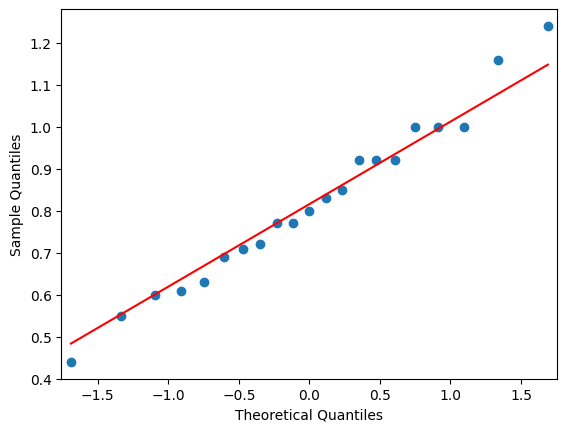

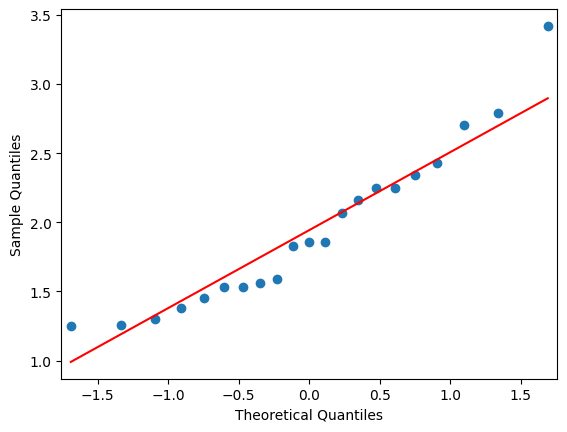

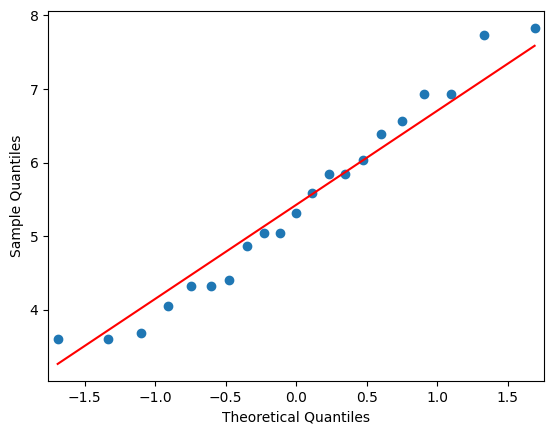

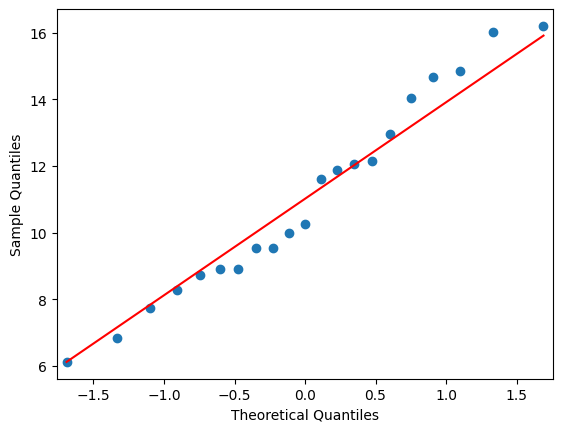

In [39]:
fig = sm.qqplot(JJ_1, line='s')
fig = sm.qqplot(JJ_2, line='s')
fig = sm.qqplot(JJ_3, line='s')
fig = sm.qqplot(JJ_4, line='s')
plt.show()

In [36]:
# проверка на равенство дисперсий

stats.bartlett(JJ_1, JJ_2, JJ_3, JJ_4)

BartlettResult(statistic=109.62893110687119, pvalue=1.3188378332498392e-23)

_pvalue_ $ < \alpha = 0.05$, следовательно нулевая гипотеза об однородности дисперсий отвергается, но так выборки одинакового объема, то неоднородность дисперсий слабо влияет на результат.

Проведем два анализа:
+ дисперсионный анализ
+ непараметрический анализ

In [37]:
stats.f_oneway(JJ_1, JJ_2, JJ_3, JJ_4) # дисперсионный анализ

F_onewayResult(statistic=162.03157448390618, pvalue=6.813074435306209e-34)

_pvalue_ $ < \alpha = 0.05$, следовательно нулевая гипотеза об отсутствии различий отвергается, прибыли различны

In [38]:
stats.kruskal(JJ_1, JJ_2, JJ_3, JJ_4)

KruskalResult(statistic=77.04853477998796, pvalue=1.318184789753617e-16)

In [45]:
scikit_posthocs.posthoc_nemenyi([JJ_1, JJ_2, JJ_3, JJ_4])

,1,2,3,4
1,1.000000e+00,0.050695,5.354358e-07,7.551443e-15
2,5.069482e-02,1.000000,4.214540e-02,1.176695e-06
3,5.354358e-07,0.042145,1.000000e+00,7.211570e-02
4,7.551443e-15,0.000001,7.211570e-02,1.000000e+00


## Задача $3$

Провести post hoc tests к задаче $2$<br>
Между какими группами не обнаружено статистически значимых различий?

In [46]:
# 3
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd 

df = pd.DataFrame({"score": [0.71, 0.63, 0.85, 0.44, 0.61, 0.69, 0.92, 0.55, 0.72, 0.77, 0.92, 0.60, 0.83, 0.80, 1.00, 0.77, 0.92, 1.00, 1.24, 1.00, 1.16,
                         1.30, 1.45, 1.25, 1.26, 1.38, 1.86, 1.56, 1.53, 1.59, 1.83, 1.86, 1.53, 2.07, 2.34, 2.25, 2.16, 2.43, 2.70, 2.25, 2.79, 3.42,
                         3.69, 3.60, 3.60, 4.32, 4.32, 4.05, 4.86, 5.04, 5.04, 4.41, 5.58, 5.85, 6.57, 5.31, 6.03, 6.39, 6.93, 5.85, 6.93, 7.74,  7.83,
                         6.12,  7.74,  8.91,  8.28, 6.84,  9.54, 10.26,  9.54, 8.73, 11.88, 12.06, 12.15, 8.91, 14.04, 12.96, 14.85, 9.99, 16.20, 14.67, 16.02, 11.61],
                 "group": np.repeat(["JJ_1","JJ_2","JJ_3","JJ_4"], repeats=21)})
df

,score,group
0,0.71,JJ_1
1,0.63,JJ_1
2,0.85,JJ_1
3,0.44,JJ_1
4,0.61,JJ_1
...,...,...
79,9.99,JJ_4
80,16.20,JJ_4
81,14.67,JJ_4
82,16.02,JJ_4


In [47]:
tukey = pairwise_tukeyhsd(df["score"], df["group"], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  JJ_1   JJ_2   1.1276 0.1282 -0.2087   2.464  False
  JJ_1   JJ_3     4.61    0.0  3.2737  5.9463   True
  JJ_1   JJ_4  10.1986    0.0  8.8622 11.5349   True
  JJ_2   JJ_3   3.4824    0.0   2.146  4.8187   True
  JJ_2   JJ_4    9.071    0.0  7.7346 10.4073   True
  JJ_3   JJ_4   5.5886    0.0  4.2522  6.9249   True
----------------------------------------------------


In [56]:
print(stats.tukey_hsd(JJ_1, JJ_2, JJ_3, JJ_4))

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -1.128     0.128    -2.464     0.209
 (0 - 2)     -4.610     0.000    -5.946    -3.274
 (0 - 3)    -10.199     0.000   -11.535    -8.862
 (1 - 0)      1.128     0.128    -0.209     2.464
 (1 - 2)     -3.482     0.000    -4.819    -2.146
 (1 - 3)     -9.071     0.000   -10.407    -7.735
 (2 - 0)      4.610     0.000     3.274     5.946
 (2 - 1)      3.482     0.000     2.146     4.819
 (2 - 3)     -5.589     0.000    -6.925    -4.252
 (3 - 0)     10.199     0.000     8.862    11.535
 (3 - 1)      9.071     0.000     7.735    10.407
 (3 - 2)      5.589     0.000     4.252     6.925



## Задача $4$

Даны веса пациентов до и после диеты.

Веса распределены нормально

До $92.8 , 95.6, 92.1, 100.6, 96.2, 92.1, 96.7, 97.6, 97.0, 93.9$<br>
После $87.1, 84.1, 81.3, 77.0, 86.0, 82.9, 83.0, 85.5, 85.2, 84.6$<br>

Проверить гипотезу о, том что средний вес пациентов после диеты статистически меньше веса до диеты

1. Используйте alternative='greater‘
2. alternative=‘less‘
3. 'two-sided'

Объясните полученные результаты p-value для каждого случая


In [52]:
# 4
x = np.array([92.8 , 95.6, 92.1, 100.6, 96.2, 92.1, 96.7, 97.6, 97.0, 93.9])
y = np.array([87.1, 84.1, 81.3, 77.0, 86.0, 82.9, 83.0, 85.5, 85.2, 84.6])

alpha = 0.05

In [50]:

stats.ttest_rel(x, y) # ДКО

TtestResult(statistic=7.972831441034037, pvalue=2.274442744681604e-05, df=9)

In [53]:
stats.ttest_rel(x, y).pvalue > alpha

False

_pvalue_ $ < \alpha = 0.05$, следовательно нулевая гипотеза об отсутствии различий отвергается, диета действует

In [34]:
stats.ttest_rel(x, y, alternative='greater') # ПКО

TtestResult(statistic=7.972831441034037, pvalue=1.137221372340802e-05, df=9)

In [54]:
stats.ttest_rel(x, y, alternative='greater').pvalue > alpha

False

_pvalue_ $ < \alpha = 0.05$, следовательно нулевая гипотеза об отсутствии различий отвергается, диета действует

In [35]:
stats.ttest_rel(x, y, alternative='less') # ЛКО

TtestResult(statistic=7.972831441034037, pvalue=0.9999886277862766, df=9)

## Задача $5$

|            Сравнение | двух групп         |       Множественные | сравнения         |
|----------------------|--------------------|---------------------|-------------------|
| Независимые выборки  | Зависимые выборки  | Независимые выборки | Зависимые выборки |
| Критерий Манна-Уитни | Критерий Уилкоксона| Крускала - Уоллиса  | Критерий Фридмана |




## Задача $6$

В одной группе из $100$ больных наблюдалось улучшение у $75$, а в другой из $100$ больных среди $69$.<br> 
Оценить с помощью доверительного интервала разность долей больных, у которых наблюдались улучшения.<br>
$\alpha = 0.05$

Интервал находим по формуле

$Δ ± z_{\frac{a}{2}} \cdot S_Δ$ , 

где $Δ$ – разность долей <br>
$S_Δ$ – стандартная ошибка разности долей

$\hat{p_1} = 75/100=0.75,$ <br>
$\hat{p_2} = 69/100=0.69$ <br>
$Δ=0.75 - 0.69 = 0.06$

Стандартная ошибка разности долей:

$S_Δ = \sqrt{p_{общ} \cdot (1-p_{общ})(\dfrac{1}{n_1} + \dfrac{1}{n_2} )}$

$p_{общ} = \dfrac{m_1+m_2}{n_1+n_2} = \dfrac{75+69}{100+100} = \dfrac{144}{200} = 0.72$

$S_Δ = \sqrt{0.72 \cdot 0.28 \cdot (\dfrac{1}{100} + \dfrac{1}{100})} = \approx 0.0635$

$Δ ± z_{\frac{a}{2}} \cdot S_Δ => 0.06 ± 1.96 \cdot 0.0635 => (-0.064; 0.184)$ <br>
Ноль принадлежит интервалу, поэтому статистически значимой разницы между группами нет

## Задача $7$

Какова вероятность, что в наудачу выбранном двузначном числе цифры одинаковые?

Вероятность это отношение положительных исходов ко всем исходам

$P = \dfrac{m}{n} = \dfrac{9}{90} = \dfrac{1}{10} = 0.1$